![0](https://yourstrulyindia.com/wp-content/uploads/2019/06/D52C710B-234C-4C19-82D6-EE3DC656F25E-1140x530.jpeg)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/zomato/zomato.csv
/kaggle/input/worldcloud/CabinSketch-Bold.ttf


In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df= pd.read_csv('../input/zomato/zomato.csv')

In [4]:
df.shape

(51717, 17)

In [5]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
df.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

## Data Cleaning

In [9]:
# duplicate values control and delete duplicates with columns "name",'address','location'
df = df.drop_duplicates(subset=["name",'address','location',], keep='last')

In [10]:
df['name'].replace(r'#', '', regex=True, inplace=True)

In [11]:
# clean rate und to numeric
df['rate'] = df['rate'].replace(r'[^\S]|/5', '', regex=True).replace(r'-|NEW|nan', np.nan , regex=True)
df['rate'] = pd.to_numeric(df['rate'])

In [12]:
# clean approx_cost und to numeric
df['approx_cost(for two people)'].replace(r'[^\w]', '' , regex=True, inplace=True)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'])


In [13]:
# split phone created 'phone1','phone2'
phone_col=['phone1','phone2']

y=0
for i in  phone_col:
    df[i] = df['phone'].str.split('\n').str[y]
    df[i] = df[i].str.replace(r'[^\d]','',regex=True)
    y+=1


In [14]:
#drop dublicate columns
df.drop(['url','phone','listed_in(city)'], axis=1, inplace=True)

## Count Plot Graphics Top 10

In [15]:
#Count Plot Graphic
def count_plot(data ,x ,y): 
    plt.figure(figsize=(x,y))
    ax = sns.countplot(x=data, palette= "Spectral" , edgecolor='white', linewidth=1, order=data.value_counts().iloc[0:10].index)
    plt.xticks(rotation=90)    
    for c in ax.containers:
        ax.bar_label(c, fmt='%.0f', label_type='edge')
    None
    

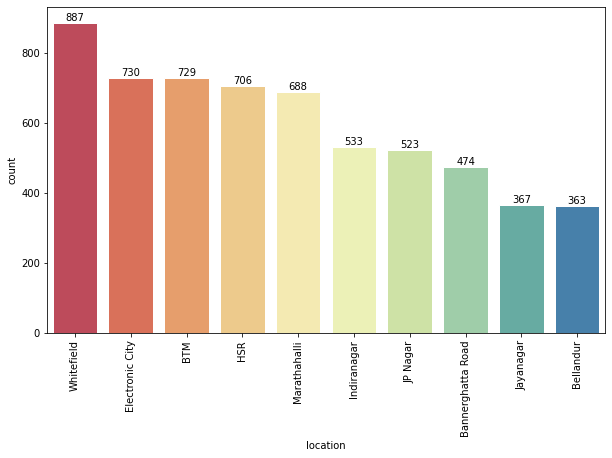

In [16]:
count_plot(df['location'], 10, 6)


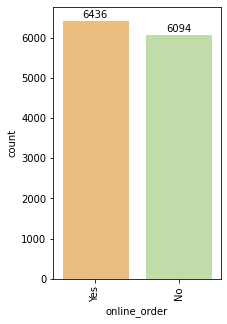

In [17]:
count_plot(df['online_order'], 3, 5)


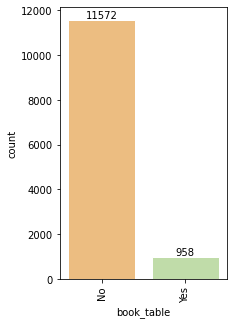

In [18]:
count_plot(df['book_table'], 3, 5)


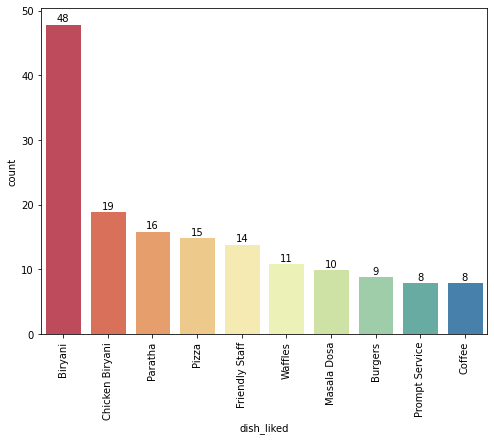

In [19]:
count_plot(df['dish_liked'], 8, 6)


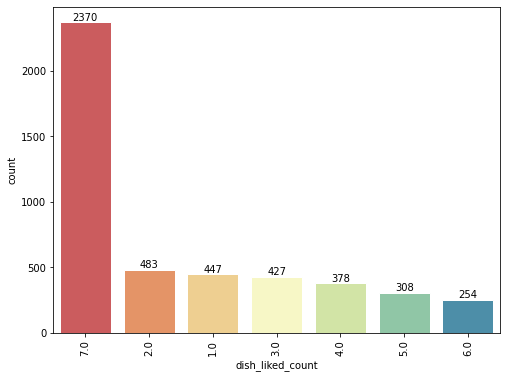

In [20]:
# count dish liked and created new column
df['dish_liked_count'] = df['dish_liked'].str.count(',') + 1
df['dish_liked_count'].describe()
count_plot(df['dish_liked_count'], 8, 6)


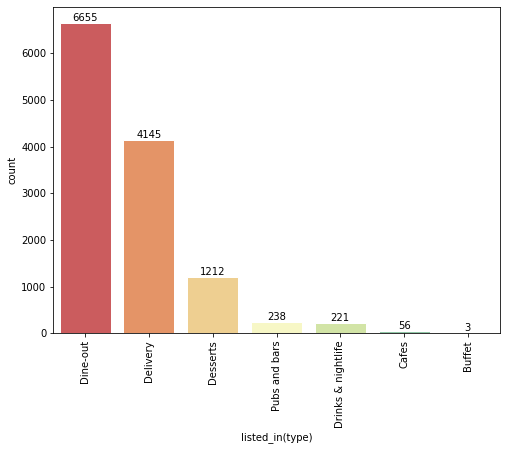

In [21]:
count_plot(df['listed_in(type)'], 8, 6)


## The relationship between Restaurant type and Approximate cost 

In [22]:
# Filter rest_type , approx_cost(for two people), rate
res_df = df[["rest_type", "approx_cost(for two people)", 'rate']]
res_df = res_df.dropna(how="any", axis=0)
res_df["rest_type"] = res_df["rest_type"].str.split(", ")
res_df = res_df.explode("rest_type")

# Get the Mean group by rest_type
res_df = res_df.groupby("rest_type").mean()["approx_cost(for two people)"].sort_values(ascending=True)
res_df = pd.DataFrame({"rest_type": res_df.index,  "approx_cost(for two people)": res_df.values})

# Show the chart
fig = px.bar(res_df,
             width =1000, height=800, 
             x     ="approx_cost(for two people)", y="rest_type", 
             title ="Rest. Type vs. Approximate Cost", text="approx_cost(for two people)", text_auto='.2s',
             color ="approx_cost(for two people)",  color_continuous_scale='viridis')

fig.show()

## Restraunt Type Count

In [23]:
# Restraunt Type Count    
gd_df_x = df['rest_type'].str.get_dummies(sep=', ')
gd_df_x = pd.DataFrame(gd_df_x.sum(), columns=['count'])
gd_df_x = gd_df_x.reset_index()
gd_df_x.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(gd_df_x,  width =1200, height=500, x='index', y='count', 
             title ="Restraunt Type Count", text="count", color="count",  color_continuous_scale='Bluyl')

fig.show()

## Rate Approx Cost 

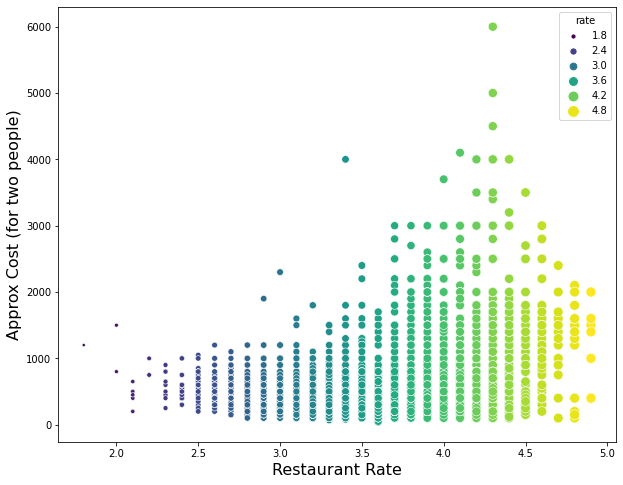

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='rate', y='approx_cost(for two people)', hue="rate", size="rate", palette='viridis', sizes=(10, 100))
plt.ylabel("Approx Cost (for two people)", size=16)
plt.xlabel("Restaurant Rate", size=16)
None

## Rate Approx Cost 

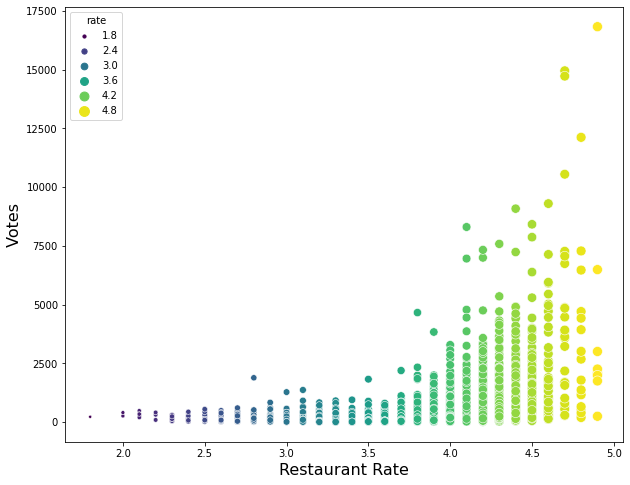

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='rate', y='votes', hue="rate", size="rate", palette='viridis', sizes=(10, 100))
plt.ylabel(" Votes ", size=16)
plt.xlabel("Restaurant Rate", size=16)
None

## Top 100 Menü Word

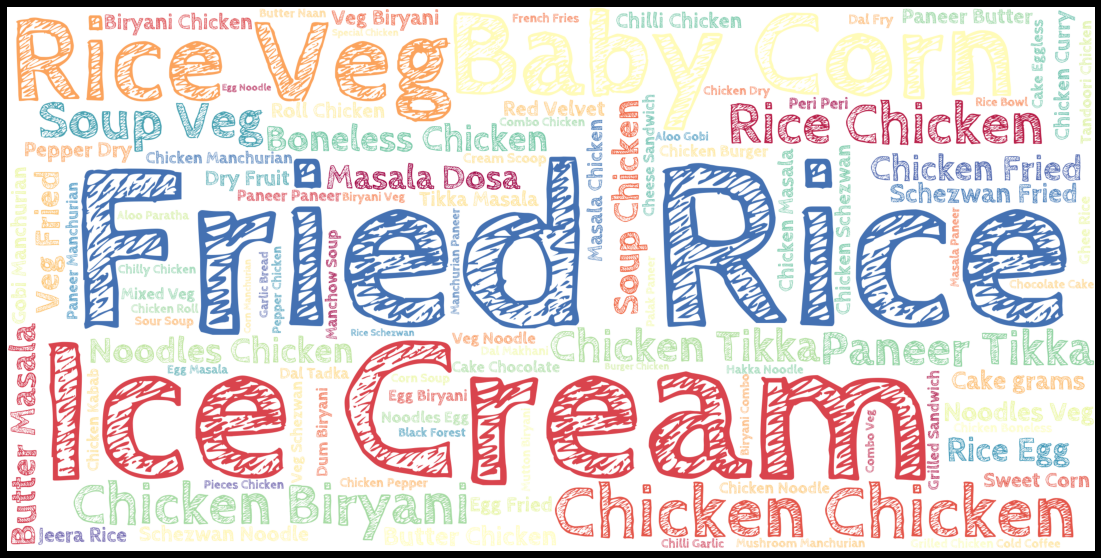

In [26]:
from wordcloud import WordCloud 

word_df = df['menu_item']
word_df = word_df.dropna(how="any", axis=0)

word_df= word_df.str.replace(r'[^\w\s]', '', regex=True).str.replace('Non|kg', '', regex=True)
text =' '.join(word_df)

wordcloud= WordCloud(font_path='../input/worldcloud/CabinSketch-Bold.ttf',
                        width=2400, height=1200,
                        background_color="white", max_words=100, colormap="Spectral").generate(text)
# Generate plot
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Top 100 dish liked

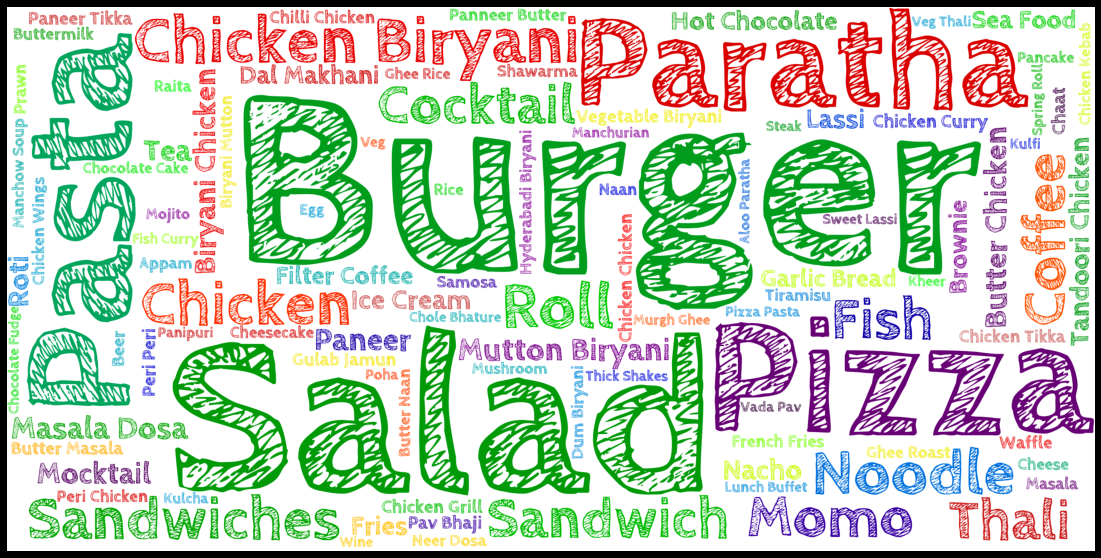

In [27]:
word_df1 = df['dish_liked']
word_df1 = word_df1.dropna(how="any", axis=0)
text1 =' '.join(word_df1)
wordcloud1= WordCloud(font_path='../input/worldcloud/CabinSketch-Bold.ttf',
                        width=2400, height=1200,
                        background_color="white", max_words=100 , colormap="nipy_spectral_r").generate(text1)
# Generate plot
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

## Most popular Top 10 Restorant

In [28]:
df0 = df[["name", "votes",'rate', 'location', 'address',]].sort_values(by='votes', ascending=False)

In [29]:
df0.set_index('name').iloc[:10]

,votes,rate,location,address
name,,,,
Byg Brewski Brewing Company,16832,4.90,Sarjapur Road,"Behind MK Retail, Sarjapur Road, Bangalore"
Toit,14956,4.70,Indiranagar,"298, Namma Metro Pillar 62, 100 Feet Road, Ind..."
Truffles,14726,4.70,Koramangala 5th Block,"28, 4th 'B' Cross, Koramangala 5th Block, Bang..."
AB's - Absolute Barbecues,12121,4.80,Marathahalli,"90/4, 3rd Floor, Outer Ring Road, Munnekollaly..."
The Black Pearl,10550,4.70,Koramangala 5th Block,"105, 1st A Cross Road, Jyothi Nivas College Ro..."
Big Pitcher,9300,4.60,Old Airport Road,"LR Arcade,4121, Old Airport Road, Bangalore"
Onesta,9085,4.40,Koramangala 4th Block,"562, 8th Main, Koramangala 4th Block, Bangalore"
Arbor Brewing Company,8419,4.50,Brigade Road,"8, 3rd Floor, Allied Grande Plaza, Diagonally ..."
Empire Restaurant,8304,4.10,Indiranagar,"Next to BSNL, HAL 2nd Stage, 80 Feet Road, Ind..."


## Location & Cost  TreeMap

In [30]:
df_loc_cost = df.groupby("location",as_index=False)["approx_cost(for two people)"].mean().round(0)
#df_loc_cost.sort_values(by='approx_cost(for two people)', ascending=False)
fig = px.treemap(df_loc_cost, path = [px.Constant("all"), "location","approx_cost(for two people)"], 
                 values   ='approx_cost(for two people)',
                 color    = 'approx_cost(for two people)',
                 color_continuous_scale = 'pinkyl',)

fig.update_layout(margin  = dict(t=50, l=30, r=30, b=30))
fig.show()

